In [1]:
# Population Dynamics final project - team AZ

import numpy as np
import matplotlib.pyplot as plt

#==============================================

In [2]:
#==============================================
# Input:
#h: change in time
#the populations of each animal:
    #c-cactus, d-dove, s-snake, o-owl, f-fox
#funct: uses Lotka-Volterra equation for each animal

#Output:
#the Euler method of finding the population after change in time, h.
#----------------------------------------------
def euler_cactus(h, c, d, s, o, f, funct):
    """Euler integrator.
    Specifically for prey.
    Returns new x at t+h.
    """
    return c + h * cactus(c, d, s, o, f)
        
def euler_dove(h, c, d, s, o, f, funct):
    return d + h * dove(c, d, s, o, f)

def euler_snake(h, c, d, s, o, f, funct):
    return s + h * snake(c, d, s, o, f)

def euler_owl(h, c, d, s, o, f, funct):
    return o + h * owl(c, d, s, o, f)

def euler_fox(h, c, d, s, o, f, funct):
    return f + h * fox(c, d, s, o, f)

In [3]:
#==============================================
# Lotka-Volterrs functions with built in competition
#----------------------------------------------

def cactus(c, d, s, o, f):
    '''Lotka-Volterra cactus equation.
    Parameters
    ----------
    c, d, s, o, f: current population of all the animals
    Returns
    ----------
    Updated cactus population
    '''
    alpha=beta=1
    return (alpha - beta*d)*c

def dove(c, d, s, o, f):
    '''Lotka-Volterra predator equation.
    Parameters
    ----------
    c, d, s, o, f: current population of all the animals
    Returns
    ----------
    Updated dove population
    '''
    alpha=beta=gamma=rho=mu=1
    return (-alpha + beta*c - gamma*s - rho*f - mu*o)*d

def snake(c, d, s, o, f):
    '''Lotka-Volterra predator equation.
    Parameters
    ----------
    c, d, s, o, f: current population of all the animals
    Returns
    ----------
    Updated snake population
    '''
    alpha=beta=gamma=1
    return (-alpha + beta*d - gamma*f)*s

def owl(c, d, s, o, f):
    '''Lotka-Volterra predator equation.
    Parameters
    ----------
    c, d, s, o, f: current population of all the animals
    Returns
    ----------
    Updated owl population
    '''
    alpha=beta=1
    return (-alpha + beta*d)*o

def fox(c, d, s, o, f):
    '''Lotka-Volterra predator equation.
    Parameters
    ----------
    c, d, s, o, f: current population of all the animals
    Returns
    ----------
    Updated fox population
    '''
    alpha=beta=gamma=1
    return (-alpha + beta*s + gamma*d)*f

In [4]:
#==============================================
# Population array filling
#----------------------------------------------
time_list=([])
cactus_list= ([])#([])
dove_list=([])
snake_list=([])
owl_list=([])
fox_list=([])
def integrate_euler(Nmax):
    '''Integrates all of the populations using Eulers method.
    Parameters
    ----------
    Nmax: number of iterations
    Returns
    ----------
    array of time points
    all population arrays
    '''
    h = 0.01
    t = 0
    c = 2
    d = 2
    s = 2
    o = 2
    f = 2
    
    for i in range(Nmax):
        c = euler_cactus(h, c, d, s, o, f, funct=cactus(c, d, s, o, f))
        cactus_list.append([c])
        d = euler_dove(h, c, d, s, o, f, funct=dove(c, d, s, o, f))
        dove_list.append([d])
        s = euler_snake(h, c, d, s, o, f, funct=snake(c, d, s, o, f))
        snake_list.append([s])
        o = euler_owl(h, c, d, s, o, f, funct=owl(c, d, s, o, f))
        owl_list.append([o])
        f = euler_fox(h, c, d, s, o, f, funct=fox(c, d, s, o, f))
        fox_list.append([f])
        t += h
        time_list.append([t])
        
    return np.array(time_list), np.array(cactus_list), np.array(dove_list), np.array(snake_list), np.array(owl_list), np.array(fox_list)

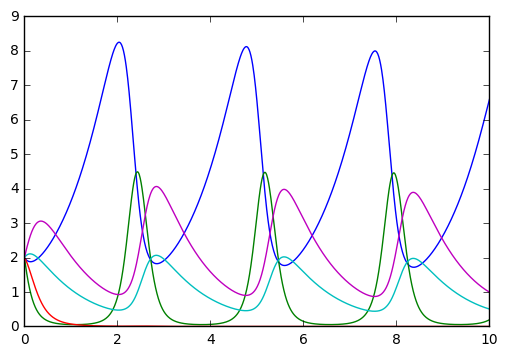

In [5]:
#==============================================
# Plot population functions with respect to time
#----------------------------------------------
x=integrate_euler(1000)
plt.plot(x[0], x[1])
plt.plot(x[0], x[2])
plt.plot(x[0], x[3])
plt.plot(x[0], x[4])
plt.plot(x[0], x[5])
plt.show()

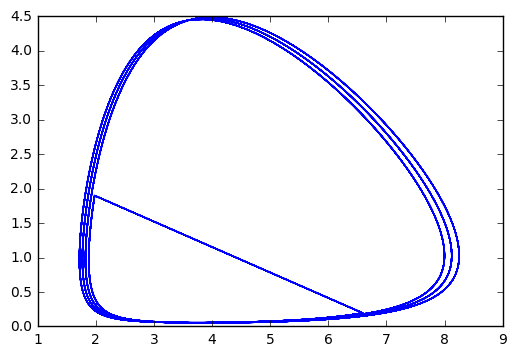

In [13]:
#==============================================
# Plot population functions with respect to each other
#can exchange any element of x to look at any
#two populations (x can be 1,2,3,4 or 5)
#not all of the combinations look great
#----------------------------------------------
x=integrate_euler(1000)
plt.plot(x[1], x[2])
plt.show()